In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
executables = ['fine_lock','coarse_lock']
threads = [1,2,4,8,16,32,64]

def set_params(no_of_threads,data_set_size=10,num_trans=1,delay=100,random=20):
    inp_params = open('inp_params.txt','w')
    inp_params.write(f'{no_of_threads} {data_set_size} {num_trans} {delay} {random}\n')
    inp_params.close()


In [4]:
#coarse lock
def run_executable(executable):
    os.system(f'{executable} > results.txt')

In [5]:
def collect_data_from_file():
    data = open('results.txt','r')
    lines = data.read().splitlines()
    abort_count =  lines[1].split(': ')[1]
    delay_time = lines[2].split(': ')[1]
    return float(abort_count),float(delay_time)

In [6]:
def collect_data_about_executable(executable,threads,samples=3):
    abort_count = []
    delay_time = []
    for i in threads:
        set_params(i)
        run_executable(executable)
        abort,delay = collect_data_from_file()
        abort_count.append(abort)
        delay_time.append(delay)
    
    for i in range(samples-1):
        for j in range(len(threads)):
            set_params(threads[j])
            run_executable(executable)
            abort,delay = collect_data_from_file()
            abort_count[j] += abort
            delay_time[j] += delay
    
    for i in range(len(threads)):
        abort_count[i] /= samples
        delay_time[i] /= samples
    return abort_count,delay_time

In [7]:
coarse_lock_abort_count,coarse_lock_delay_time = collect_data_about_executable('./coarse_lock',threads)

In [8]:
mvto_abort_count,mvto_delay_time = collect_data_about_executable('./mvto-opt-test',threads)

In [23]:
bocc_abort_count,bocc_delay_time = collect_data_about_executable('./bocc',threads)

In [10]:
fine_lock_abort_count,fine_lock_delay_time = collect_data_about_executable('./fine_lock',threads)

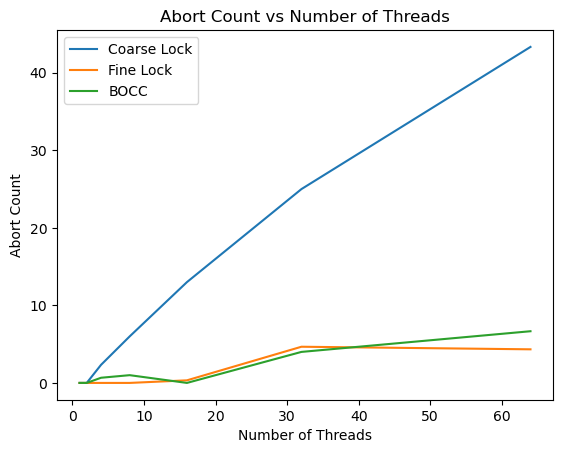

In [28]:
plt.plot(threads,coarse_lock_abort_count,label='Coarse Lock')
# plt.plot(threads,mvto_abort_count,label='MVTO')
plt.plot(threads,fine_lock_abort_count,label='Fine Lock')
plt.plot(threads,bocc_abort_count,label='BOCC')
plt.xlabel('Number of Threads')
plt.ylabel('Abort Count')
plt.title('Abort Count vs Number of Threads')
plt.legend()
plt.close(plt.figure())
plt.savefig("aborts_cmp_bocc.png",dpi=300)

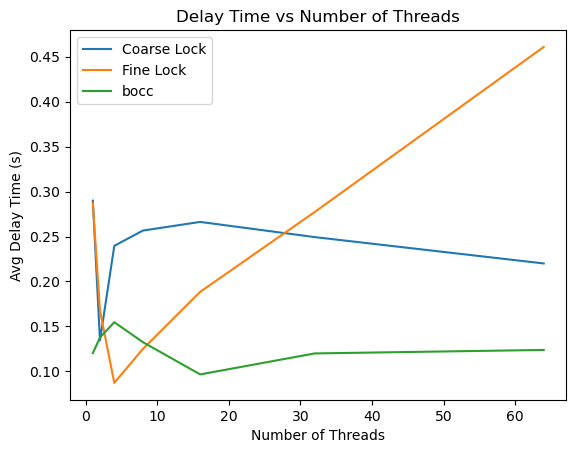

In [29]:
plt.plot(threads,coarse_lock_delay_time,label='Coarse Lock')
# plt.plot(threads,mvto_delay_time,label='MVTO')
plt.plot(threads,fine_lock_delay_time,label='Fine Lock')
plt.plot(threads,bocc_delay_time,label="bocc")
plt.xlabel('Number of Threads')
plt.ylabel('Avg Delay Time (s)')
plt.title('Delay Time vs Number of Threads')
plt.legend()
plt.savefig("delay_cmp_bocc.png",dpi=300)